In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
df = pd.read_csv('../Datasets/cases/Sonar/Sonar.csv')
X = df.drop('Class', axis=1)
y = df['Class']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [11]:
X_train.shape

(145, 60)

In [ ]:
features = np.arange(1, 30)
scores = []

for f in tqdm(features):
    rf = RandomForestClassifier(random_state=25, max_features=f)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append([f, f1_score(y_test, y_pred)])

df_scores = pd.DataFrame(scores, columns=['features', 'f1'])
df_scores.sort_values('f1', ascending=False)

100%|██████████| 29/29 [00:08<00:00,  3.57it/s]


,features,f1
19,20,0.666667
24,25,0.666667
13,14,0.652174
4,5,0.651163
3,4,0.636364
18,19,0.636364
2,3,0.636364
20,21,0.625000
22,23,0.625000
9,10,0.622222


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dtc = DecisionTreeClassifier(random_state=25)
dtc.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,25
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


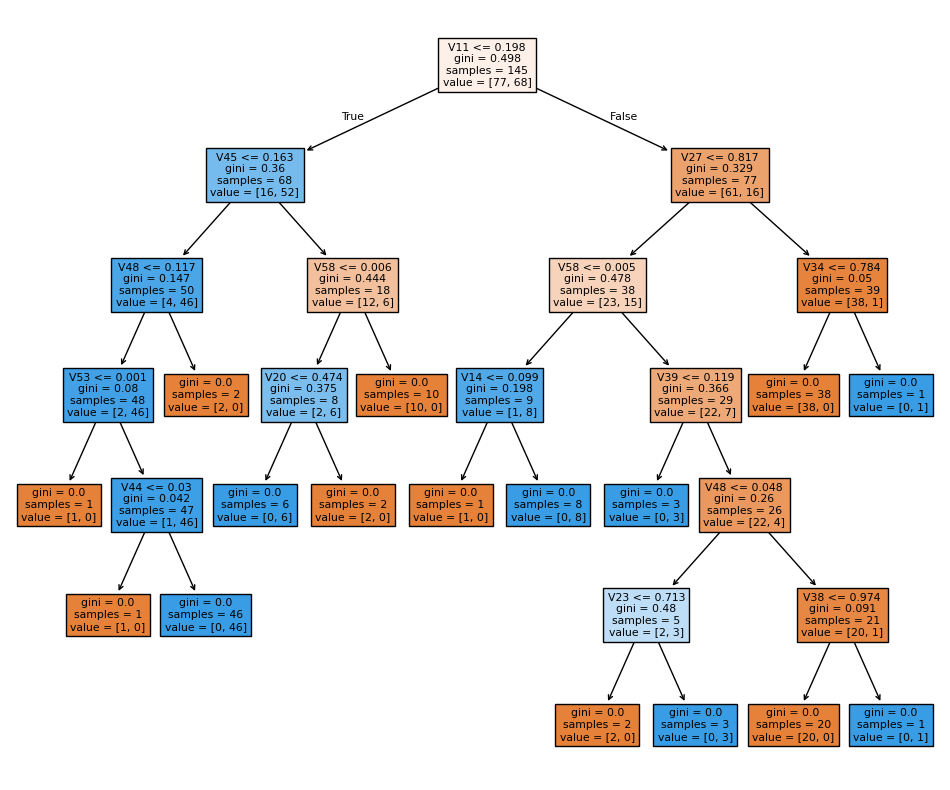

In [16]:
plt.figure(figsize=(12, 10))
plot_tree(dtc, feature_names=X_train.columns, filled=True)
plt.show()

In [18]:
rf = RandomForestClassifier(random_state=25, max_features=20)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
df_imp = pd.DataFrame({
    'Features':X_train.columns,
    'Importance':rf.feature_importances_
})
df_imp.sort_values('Importance', inplace=True)

<BarContainer object of 60 artists>

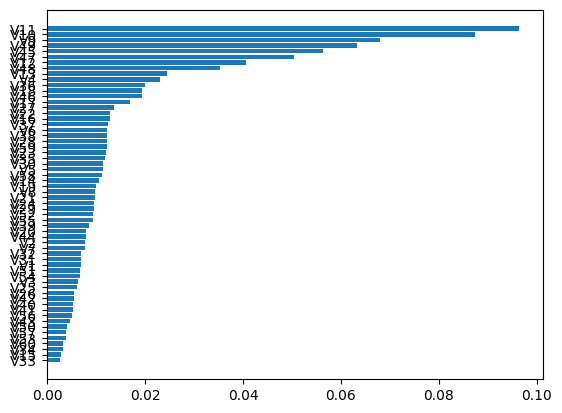

In [23]:
plt.barh(df_imp['Features'], df_imp['Importance'])